<a href="https://colab.research.google.com/github/amaziarczyk/Data-Science/blob/main/Regresja_liniowa_i_eliminacja__wsteczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='0'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

'0.22.2.post1'

### <a name='1'></a> Wczytanie danych

In [ ]:
df_raw = pd.read_excel('/content/drive/MyDrive/Artykuł struktura kapitału_python/Zeszyt1.xlsx')
df_raw.head()

,Source.Name.1,sektor,mediana,średnia zadł ogół,podatek,średnia ROA,ln SIZE,wsk rzecz ak trw/ao,wskażnik dywidendy,ryzyko,średnia wsk dźwig fin,Struktura
0,AGORA,usługi,0.54,0.268842,0.629528,0.016473,2.660557,0.808878,0.033130,0.482471,1.366505,0.018795
1,AMICA,przemysł,0.46,0.591172,0.069862,0.047287,2.625140,0.486058,0.038090,0.198194,2.669319,0.042818
2,AMREST,usługi,0.54,0.585974,0.125818,0.049117,2.658260,0.864786,0.001041,0.153558,2.451094,0.041059
3,APATOR,przemysł,0.46,0.407365,0.154644,0.129215,2.561322,0.565156,0.102120,0.035926,1.706892,0.031450
4,APLISENS,przemysł,0.46,0.091589,0.151960,0.140450,2.435260,1.020143,0.054106,0.001844,1.101638,0.008021


### <a name='2'></a> Utworzenie kopii danych

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Source.Name.1          147 non-null    object 
 1   sektor                 147 non-null    object 
 2   mediana                147 non-null    float64
 3   średnia zadł ogół      147 non-null    float64
 4   podatek                147 non-null    float64
 5   średnia ROA            147 non-null    float64
 6   ln SIZE                147 non-null    float64
 7   wsk rzecz ak trw/ao    147 non-null    float64
 8   wskażnik dywidendy     147 non-null    float64
 9   ryzyko                 147 non-null    float64
 10  średnia wsk dźwig fin  147 non-null    float64
 11  Struktura              147 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.9+ KB


### <a name='3'></a> Eksplorcja i wstępne przygotowanie danych

In [ ]:
df[df.duplicated()]

,Source.Name.1,sektor,mediana,średnia zadł ogół,podatek,średnia ROA,ln SIZE,wsk rzecz ak trw/ao,wskażnik dywidendy,ryzyko,średnia wsk dźwig fin,Struktura


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['Source.Name.1', 'sektor']

In [ ]:
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Source.Name.1          147 non-null    category
 1   sektor                 147 non-null    category
 2   mediana                147 non-null    float64 
 3   średnia zadł ogół      147 non-null    float64 
 4   podatek                147 non-null    float64 
 5   średnia ROA            147 non-null    float64 
 6   ln SIZE                147 non-null    float64 
 7   wsk rzecz ak trw/ao    147 non-null    float64 
 8   wskażnik dywidendy     147 non-null    float64 
 9   ryzyko                 147 non-null    float64 
 10  średnia wsk dźwig fin  147 non-null    float64 
 11  Struktura              147 non-null    float64 
dtypes: category(2), float64(10)
memory usage: 18.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mediana,147.0,0.486122,0.037644,0.460000,0.460000,0.460000,0.540000,0.540000
średnia zadł ogół,147.0,0.490188,0.189885,0.091589,0.359132,0.474585,0.592034,1.513936
podatek,147.0,0.273687,0.641086,0.001157,0.117073,0.169385,0.222351,6.942928
średnia ROA,147.0,0.032426,0.058864,-0.237710,0.005507,0.039743,0.061134,0.167009
ln SIZE,147.0,2.563755,0.125509,2.303283,2.468733,2.561136,2.651538,3.000861
wsk rzecz ak trw/ao,147.0,0.604101,0.452563,0.001196,0.230715,0.565156,0.945867,1.778996
wskażnik dywidendy,147.0,0.056354,0.066539,0.000000,0.018659,0.045770,0.064634,0.548264
ryzyko,147.0,0.367895,0.775370,0.001844,0.071887,0.157211,0.343918,7.781722
średnia wsk dźwig fin,147.0,2.242022,1.400967,-5.590947,1.561740,1.891064,2.551311,9.203893
Struktura,147.0,0.037570,0.015131,0.008021,0.027885,0.035503,0.046035,0.134787


In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
Source.Name.1,147,147,ZYWIEC,1
sektor,147,2,przemysł,99


In [ ]:
df.isnull().sum()

Source.Name.1            0
sektor                   0
mediana                  0
średnia zadł ogół        0
podatek                  0
średnia ROA              0
ln SIZE                  0
wsk rzecz ak trw/ao      0
wskażnik dywidendy       0
ryzyko                   0
średnia wsk dźwig fin    0
Struktura                0
dtype: int64

In [ ]:
df.sektor.value_counts()

przemysł    99
usługi      48
Name: sektor, dtype: int64

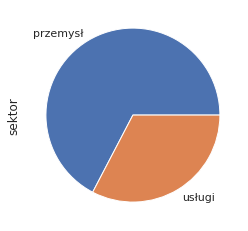

In [ ]:
df.sektor.value_counts().plot(kind='pie')

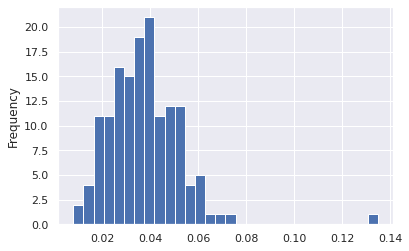

In [ ]:
df.Struktura.plot(kind='hist', bins=30)

In [ ]:
import plotly.express as px

px.histogram(df, x='Struktura', width=700, height=400, nbins=50, facet_col='sektor')

In [ ]:
df=df.drop(columns='Source.Name.1', axis=1)
df.head()

,sektor,mediana,średnia zadł ogół,podatek,średnia ROA,ln SIZE,wsk rzecz ak trw/ao,wskażnik dywidendy,ryzyko,średnia wsk dźwig fin,Struktura
0,usługi,0.54,0.268842,0.629528,0.016473,2.660557,0.808878,0.033130,0.482471,1.366505,0.018795
1,przemysł,0.46,0.591172,0.069862,0.047287,2.625140,0.486058,0.038090,0.198194,2.669319,0.042818
2,usługi,0.54,0.585974,0.125818,0.049117,2.658260,0.864786,0.001041,0.153558,2.451094,0.041059
3,przemysł,0.46,0.407365,0.154644,0.129215,2.561322,0.565156,0.102120,0.035926,1.706892,0.031450
4,przemysł,0.46,0.091589,0.151960,0.140450,2.435260,1.020143,0.054106,0.001844,1.101638,0.008021


In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,mediana,średnia zadł ogół,podatek,średnia ROA,ln SIZE,wsk rzecz ak trw/ao,wskażnik dywidendy,ryzyko,średnia wsk dźwig fin,Struktura,sektor_usługi
0,0.54,0.268842,0.629528,0.016473,2.660557,0.808878,0.033130,0.482471,1.366505,0.018795,1
1,0.46,0.591172,0.069862,0.047287,2.625140,0.486058,0.038090,0.198194,2.669319,0.042818,0
2,0.54,0.585974,0.125818,0.049117,2.658260,0.864786,0.001041,0.153558,2.451094,0.041059,1
3,0.46,0.407365,0.154644,0.129215,2.561322,0.565156,0.102120,0.035926,1.706892,0.031450,0
4,0.46,0.091589,0.151960,0.140450,2.435260,1.020143,0.054106,0.001844,1.101638,0.008021,0


In [ ]:
corr = df_dummies.corr()
corr

,mediana,średnia zadł ogół,podatek,średnia ROA,ln SIZE,wsk rzecz ak trw/ao,wskażnik dywidendy,ryzyko,średnia wsk dźwig fin,Struktura,sektor_usługi
mediana,1.000000,0.117700,-0.055128,-0.167250,-0.111398,-0.412264,0.065381,0.090935,0.088231,0.158539,1.000000
średnia zadł ogół,0.117700,1.000000,-0.016822,-0.245798,0.154494,-0.153636,-0.079131,0.045021,0.325231,0.947543,0.117700
podatek,-0.055128,-0.016822,1.000000,-0.095772,-0.029729,-0.022054,-0.073390,0.514627,0.000607,-0.010781,-0.055128
średnia ROA,-0.167250,-0.245798,-0.095772,1.000000,0.205685,0.077868,0.308821,-0.177888,0.039731,-0.310615,-0.167250
ln SIZE,-0.111398,0.154494,-0.029729,0.205685,1.000000,0.266358,-0.035661,-0.041895,0.164114,-0.129886,-0.111398
wsk rzecz ak trw/ao,-0.412264,-0.153636,-0.022054,0.077868,0.266358,1.000000,-0.063913,0.073769,-0.087493,-0.197130,-0.412264
wskażnik dywidendy,0.065381,-0.079131,-0.073390,0.308821,-0.035661,-0.063913,1.000000,-0.149309,-0.129383,-0.067550,0.065381
ryzyko,0.090935,0.045021,0.514627,-0.177888,-0.041895,0.073769,-0.149309,1.000000,0.051453,0.058461,0.090935
średnia wsk dźwig fin,0.088231,0.325231,0.000607,0.039731,0.164114,-0.087493,-0.129383,0.051453,1.000000,0.222839,0.088231
Struktura,0.158539,0.947543,-0.010781,-0.310615,-0.129886,-0.197130,-0.067550,0.058461,0.222839,1.000000,0.158539


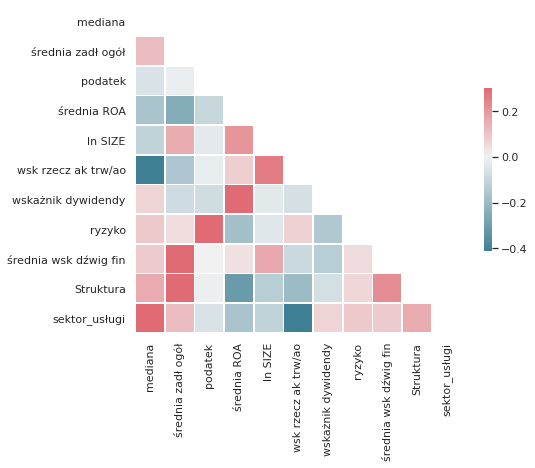

In [ ]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_dummies.corr()['Struktura'].sort_values(ascending=False)

Struktura                1.000000
średnia zadł ogół        0.947543
średnia wsk dźwig fin    0.222839
mediana                  0.158539
sektor_usługi            0.158539
ryzyko                   0.058461
podatek                 -0.010781
wskażnik dywidendy      -0.067550
ln SIZE                 -0.129886
wsk rzecz ak trw/ao     -0.197130
średnia ROA             -0.310615
Name: Struktura, dtype: float64

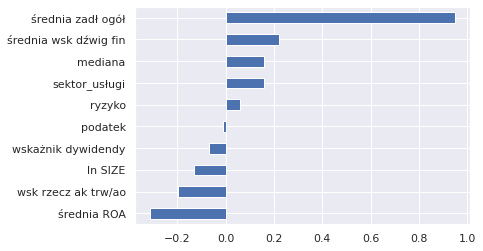

In [ ]:
sns.set()
df_dummies.corr()['Struktura'].sort_values()[:-1].plot(kind='barh')

In [ ]:
data = df_dummies.copy()
target = data.pop('Struktura')
data.head()

,mediana,średnia zadł ogół,podatek,średnia ROA,ln SIZE,wsk rzecz ak trw/ao,wskażnik dywidendy,ryzyko,średnia wsk dźwig fin,sektor_usługi
0,0.54,0.268842,0.629528,0.016473,2.660557,0.808878,0.033130,0.482471,1.366505,1
1,0.46,0.591172,0.069862,0.047287,2.625140,0.486058,0.038090,0.198194,2.669319,0
2,0.54,0.585974,0.125818,0.049117,2.658260,0.864786,0.001041,0.153558,2.451094,1
3,0.46,0.407365,0.154644,0.129215,2.561322,0.565156,0.102120,0.035926,1.706892,0
4,0.46,0.091589,0.151960,0.140450,2.435260,1.020143,0.054106,0.001844,1.101638,0


In [ ]:
target.head()

0    0.018795
1    0.042818
2    0.041059
3    0.031450
4    0.008021
Name: Struktura, dtype: float64

### <a name='4'></a> Podział danych na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (117, 10)
X_test shape: (30, 10)
y_trian shape: (117,)
y_test shape: (30,)


### <a name='5'></a> Regresja liniowa

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

R2 score: 0.9705


In [ ]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([0.0316, 0.0494, 0.0546, 0.0397, 0.0401, 0.0223, 0.0524, 0.0504,
       0.0413, 0.038 ])

In [ ]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
125,0.030622,0.031592,-0.000970
51,0.049843,0.049366,0.000477
138,0.055910,0.054620,0.001290
19,0.038629,0.039742,-0.001113
104,0.040332,0.040072,0.000260


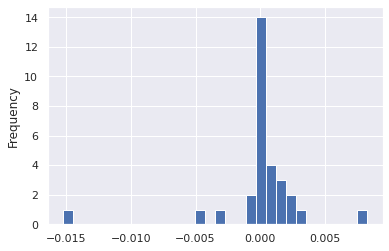

In [ ]:
predictions.error.plot(kind='hist', bins=30)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wynosi: {mae:.2f}')

MAE wynosi: 0.00


In [ ]:
regressor.intercept_

0.08359649336714077

In [ ]:
regressor.coef_

array([ 0.    ,  0.0793, -0.    , -0.0003, -0.0331,  0.0011, -0.001 ,
       -0.    , -0.0003,  0.0004])

In [ ]:
data.columns

Index(['mediana', 'średnia zadł ogół', 'podatek', 'średnia ROA', 'ln SIZE',
       'wsk rzecz ak trw/ao', 'wskażnik dywidendy', 'ryzyko',
       'średnia wsk dźwig fin', 'sektor_usługi'],
      dtype='object')

### <a name='6'></a> Dobór cech modelu - eliminacja wsteczna

In [ ]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



array([[1.    , 0.46  , 0.5581, ..., 0.4275, 2.4352, 0.    ],
       [1.    , 0.46  , 0.236 , ..., 0.3768, 1.3531, 0.    ],
       [1.    , 0.46  , 0.3335, ..., 0.1913, 1.6266, 0.    ],
       ...,
       [1.    , 0.46  , 0.6714, ..., 0.3768, 4.6516, 0.    ],
       [1.    , 0.54  , 0.1893, ..., 0.4644, 1.2486, 1.    ],
       [1.    , 0.46  , 0.5164, ..., 0.1083, 2.069 , 0.    ]])

In [ ]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     757.7
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.34e-92
Time:                        16:36:58   Log-Likelihood:                 584.73
No. Observations:                 117   AIC:                            -1149.
Df Residuals:                     107   BIC:                            -1122.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [ ]:
X_selected = X_train_ols[:, [0, 1, 2, 4, 5, 6, 7, 8,9,10]]
predictors.remove('podatek')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     860.3
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.44e-94
Time:                        16:39:22   Log-Likelihood:                 584.73
No. Observations:                 117   AIC:                            -1151.
Df Residuals:                     108   BIC:                            -1127.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [ ]:
X_selected = X_train_ols[:, [0, 1, 2, 3,4, 5,6, 8,9]]
predictors.remove('ryzyko')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     858.9
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.84e-94
Time:                        16:40:21   Log-Likelihood:                 584.63
No. Observations:                 117   AIC:                            -1151.
Df Residuals:                     108   BIC:                            -1126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [ ]:
X_selected = X_train_ols[:, [0, 1, 2, 3,4, 5,6, 8]]
predictors.remove('średnia wsk dźwig fin')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     957.6
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           9.18e-95
Time:                        16:41:18   Log-Likelihood:                 582.67
No. Observations:                 117   AIC:                            -1149.
Df Residuals:                     109   BIC:                            -1127.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0818    

In [ ]:
X_selected = X_train_ols[:, [0, 1, 2, 4, 5,6,7]]
predictors.remove('średnia ROA')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.61e-96
Time:                        16:42:02   Log-Likelihood:                 582.68
No. Observations:                 117   AIC:                            -1151.
Df Residuals:                     110   BIC:                            -1132.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0818    

In [ ]:
X_selected = X_train_ols[:, [0, 1, 2, 3,4, 5]]
predictors.remove('sektor_usługi')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.29e-96
Time:                        16:43:03   Log-Likelihood:                 579.56
No. Observations:                 117   AIC:                            -1147.
Df Residuals:                     111   BIC:                            -1131.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0822    

In [ ]:
X_selected = X_train_ols[:, [0, 1, 2, 4, 5]]
predictors.remove('ln SIZE')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1631.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           3.01e-98
Time:                        16:43:50   Log-Likelihood:                 579.55
No. Observations:                 117   AIC:                            -1149.
Df Residuals:                     112   BIC:                            -1135.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0821    

In [ ]:
X_selected = X_train_ols[:, [0, 2, 3,4]]
predictors.remove('mediana')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     325.5
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.00e-55
Time:                        16:44:41   Log-Likelihood:                 473.34
No. Observations:                 117   AIC:                            -938.7
Df Residuals:                     113   BIC:                            -927.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0037    

### <a name='7'></a> Eliminacja wsteczna - automatyzacja

In [ ]:
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)
num_vars = len(X_train_numpy[0])

predictors = ['const'] + list(X_train.columns)
sl = 0.05

for i in range(0, num_vars):
    ols = sm.OLS(endog=y_train, exog=X_train_numpy).fit()
    max_pval = max(ols.pvalues.astype('float'))
    if max_pval > sl:
        for j in range(0, num_vars - i):
            if ols.pvalues[j].astype('float') == max_pval:
                X_train_numpy = np.delete(X_train_numpy, j, axis=1)
                predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:              Struktura   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1719.
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.66e-99
Time:                        16:46:10   Log-Likelihood:                 582.58
No. Observations:                 117   AIC:                            -1155.
Df Residuals:                     112   BIC:                            -1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0690    

### <a name='8'></a> Zapisanie końcowego modelu

In [ ]:
ols.save('model_regresja.pickle')